## Feature Engineering Assignment

In [30]:
# load libraries 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score

In [31]:
# Data set load

coffee = pd.read_csv('starbucks_customers.csv', delimiter=";")
coffee.head()

,spent,nearest_starbucks,age,rate_quality,rate_price,rate_promo,ambiance,wifi,service,meetings_hangout
0,13,8,52,4,4,4,4,4,4,4
1,25,8,35,4,5,5,4,4,3,3
2,10,8,29,2,1,5,2,2,2,2
3,7,8,28,4,1,4,5,3,3,4
4,10,8,28,4,2,4,4,3,4,3


Above data shows the starbucks customer data its showing features like spent, nearest_starbucks, age, rate_quality, rate_price, rate_promo, ambiance, wifi, service and meeting hangout.

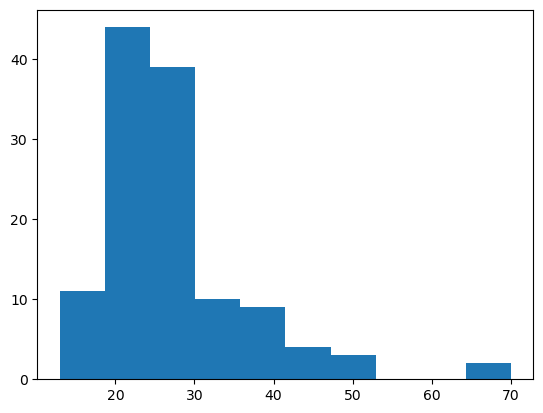

In [32]:
# Plot the customer age histogram.

ages=coffee["age"]
plt.hist(ages, bins=10)
plt.show()

In [33]:
# findout Minimum and Maximum age

min_age=min(ages)
max_age=max(ages)
print( min_age)
print(max_age)

13
70


In [34]:
# Find the mean age 

mean_ages= ages.mean()
print (mean_ages)

27.33606557377049


In [35]:
# find out the centered age

centered_ages=ages-mean_ages
print(centered_ages)

0      24.663934
1       7.663934
2       1.663934
3       0.663934
4       0.663934
         ...    
117    -5.336066
118    -5.336066
119    -7.336066
120    -7.336066
121   -13.336066
Name: age, Length: 122, dtype: float64


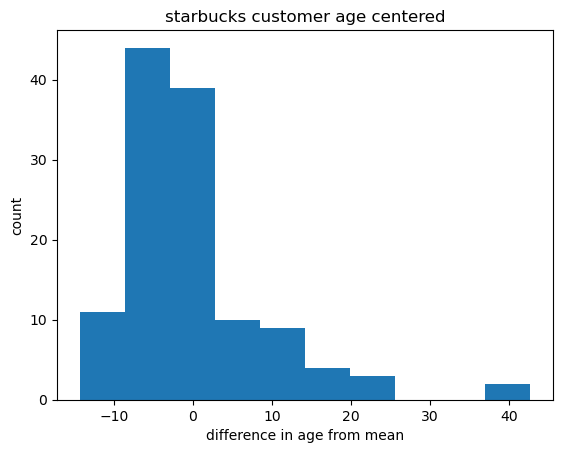

In [36]:
# Plot the customer age centered histogram.

plt.hist(centered_ages, bins=10,)
plt.title('starbucks customer age centered')
plt.xlabel('difference in age from mean')
plt.ylabel('count')
plt.show()

In [37]:
centered_age_means=centered_ages.mean()
print(centered_age_means)

9.318593255870167e-16


In [38]:
# using scaling with standrad scaler.

std_dev_age=np.std(ages)
print(std_dev_age)

9.428428111378786


In [39]:
ages_standardization=centered_ages/std_dev_age
print(ages_standardization)
print(np.mean(ages_standardization))
print(np.std(ages_standardization))

0      2.615912
1      0.812854
2      0.176481
3      0.070418
4      0.070418
         ...   
117   -0.565955
118   -0.565955
119   -0.778079
120   -0.778079
121   -1.414453
Name: age, Length: 122, dtype: float64
1.383228686418228e-16
1.0000000000000002


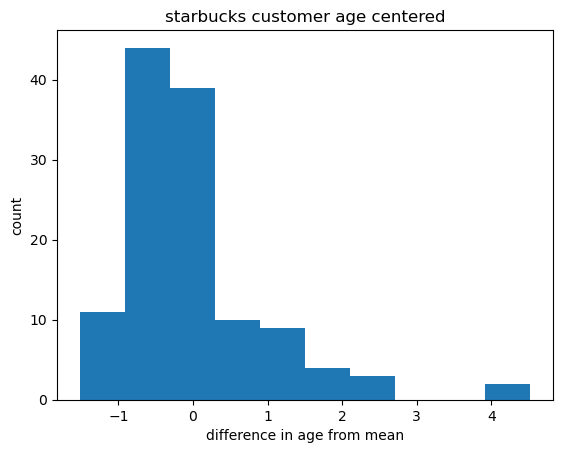

In [40]:
plt.hist(ages_standardization, bins=10,)
plt.title('starbucks customer age centered')
plt.xlabel('difference in age from mean')
plt.ylabel('count')
plt.show()

## Standard scaler Method

In [41]:
# using standard scaler method.

scaler=StandardScaler()
ages_reshaped=np.array(ages).reshape(-1,1)
ages_scaled=scaler.fit_transform(ages_reshaped)
print(np.mean(ages_scaled))
print(np.std(ages_scaled))

1.7290358580227847e-16
0.9999999999999999


In [42]:
# Maximum spent and Minimum spent 

spent=coffee["spent"]
min_spent=min(spent)
max_spent=max(spent)
print(min_spent)
print(max_spent)

0
28


In [43]:
#find the difference between spent 

diff_spent= max_spent-min_spent
print (diff_spent)

28


In [44]:
# normalised spent by customer.

normalised_spent= (spent- min_spent)/(diff_spent)
print (normalised_spent)

0      0.464286
1      0.892857
2      0.357143
3      0.250000
4      0.357143
         ...   
117    0.178571
118    0.571429
119    0.071429
120    0.678571
121    0.107143
Name: spent, Length: 122, dtype: float64


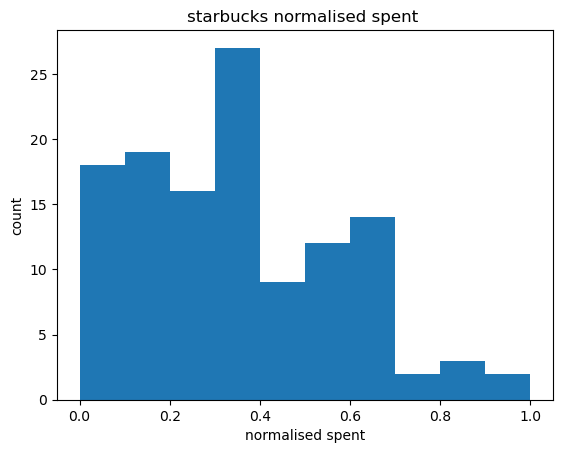

In [45]:
# Plot the histogram Normalised spent by customer

plt.hist(normalised_spent, bins=10,)
plt.title('starbucks normalised spent ')
plt.xlabel('normalised spent')
plt.ylabel('count')
plt.show()

In [46]:
# using min max scaler method.

mmscaler = MinMaxScaler()
spent_reshaped = np.array(spent).reshape(-1,1)
spent_mmscaler = mmscaler.fit_transform(spent_reshaped)
print(np.min(spent_mmscaler))
print(np.max(spent_mmscaler))


0.0
1.0


## MinMax scaler method

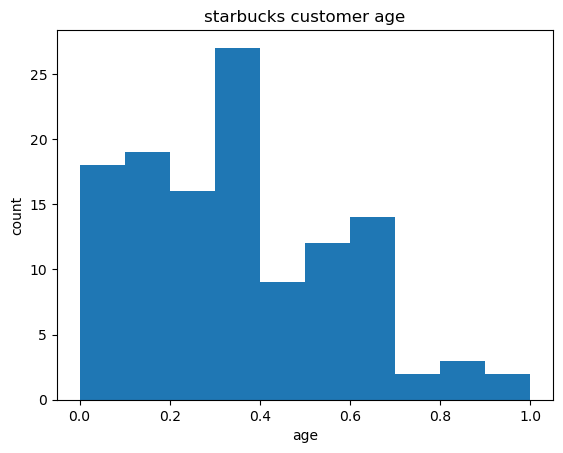

In [47]:
# plot histogram for customer age using Maxmin scaler method.

plt.hist(spent_mmscaler, bins=10,)
plt.title('starbucks customer age')
plt.xlabel('age')
plt.ylabel('count')
plt.show()

In [48]:
# using bins for normalised the data.

age_bins=[12, 20, 30, 40,75]
coffee["binned_ages"]=pd.cut(coffee['age'], age_bins, right=False)
print(coffee["binned_ages"].head(10))

0    [40, 75)
1    [30, 40)
2    [20, 30)
3    [20, 30)
4    [20, 30)
5    [20, 30)
6    [20, 30)
7    [20, 30)
8    [20, 30)
9    [20, 30)
Name: binned_ages, dtype: category
Categories (4, interval[int64, left]): [[12, 20) < [20, 30) < [30, 40) < [40, 75)]


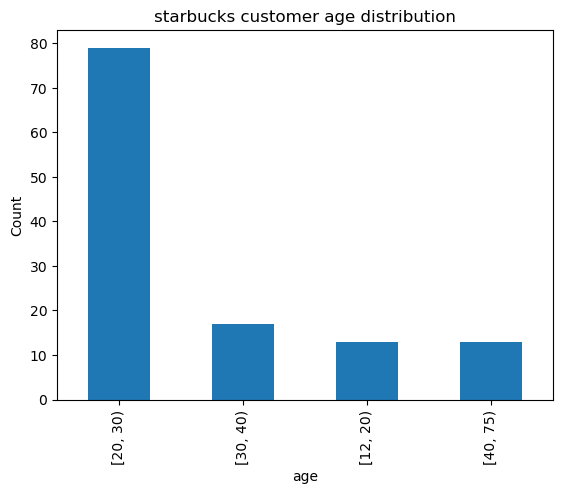

In [49]:
# plot the graph between the starbucks customer age distribution.

coffee["binned_ages"].value_counts().plot(kind='bar')
plt.title('starbucks customer age distribution')
plt.xlabel('age')
plt.ylabel('Count')
plt.show()


It is showing x-axis as age range and y-axis as the count of customers in that age range. largest age group of Starbucks customers are between 20 and 30 years old also less customer in between 40 to 75 age group.

## Log function for data normalising


In [50]:
# Another data loading
cars=pd.read_csv("cars.csv", delimiter=";")
cars.head()

,Unnamed: 0,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,Unnamed: 16
0,449069,2006,Chrysler,300,Base,Sedan,automatic,2c3ka43r76h366165,il,1.9,119618.0,blue,gray,go financial,4775,2500,Thu May 28 2015 03:00:00 GMT-0700 (PDT),NaN
1,197199,2014,Volkswagen,Jetta,S,Sedan,manual,3vw1k7aj9em275429,ca,4.9,7740.0,—,black,volkswagen credit inc/sc,12050,12750,Wed Jul 01 2015 09:30:00 GMT-0700 (PDT),NaN
2,288171,2007,Dodge,Durango,SLT,SUV,automatic,1d8hd48p97f510727,fl,1.9,166628.0,gold,tan,mid atlantic finance/clearwater,2850,2700,Wed Feb 11 2015 08:00:00 GMT-0800 (PST),NaN
3,277025,2013,Mercedes-Benz,E-Class,E350 Sport,Sedan,automatic,wddhf5kb3da735753,tx,3.8,23923.0,white,off-white,mercedes-benz financial services,32200,32000,Thu Feb 12 2015 03:00:00 GMT-0800 (PST),NaN
4,322760,2013,Ford,Explorer,XLT,SUV,automatic,1fm5k8d84dgc59887,mi,5.0,18494.0,red,black,"ford motor credit company,llc",29100,28100,Thu Jun 11 2015 02:30:00 GMT-0700 (PDT),NaN


The above data shows cars details, "year", "make", "model", "transmission" ,"state", "condition", "color", " interior" this types features.

In [51]:
#  using log function for normalisation

price=cars["sellingprice"]

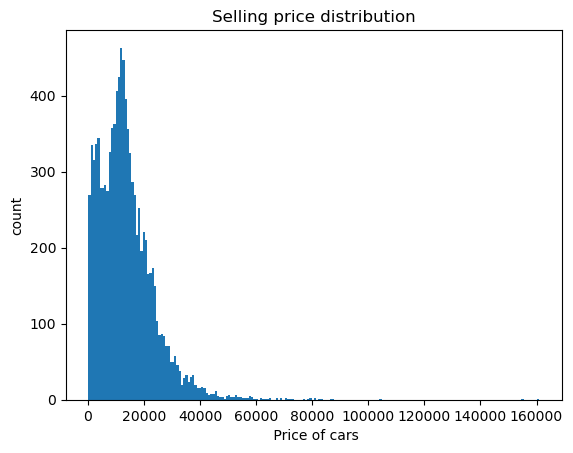

In [52]:
# plot histogram without log function

plt.hist(price, bins=200)
plt.title("Selling price distribution")
plt.xlabel(" Price of cars")
plt.ylabel("count")

plt.show()

The above graph is shows that price of cars vs count, and basically it shows right skewed distribution.

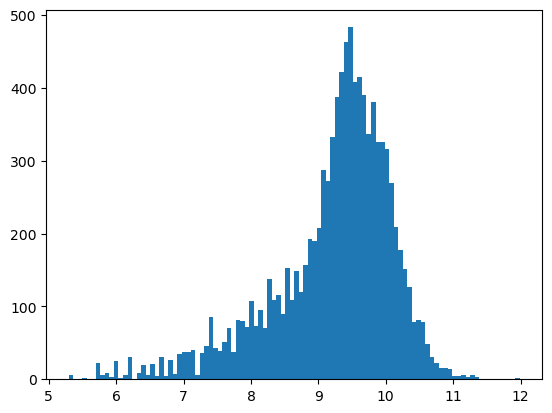

In [53]:
# #using log function of price 

log_price=np.log(price)

# plot histogram with log function of price

plt.hist(log_price, bins=100)
plt.show()

Now the following graph indicates an almost normal distribution. 

In [54]:
# unique in make features

cars["make"].unique()

array(['Chrysler', 'Volkswagen', 'Dodge', 'Mercedes-Benz', 'Ford',
       'Toyota', 'Honda', 'Nissan', 'Chevrolet', 'Jeep', 'Hyundai', 'GMC',
       'Jaguar', 'Audi', 'Lexus', 'Pontiac', 'BMW', nan, 'Suzuki',
       'Mitsubishi', 'Kia', 'MINI', 'Ram', 'Acura', 'Subaru', 'Buick',
       'Mazda', 'Volvo', 'Infiniti', 'mazda', 'cadillac', 'Isuzu', 'bmw',
       'Mercury', 'Land Rover', 'Lincoln', 'smart', 'nissan', 'HUMMER',
       'Cadillac', 'Saturn', 'Scion', 'Saab', 'FIAT', 'Porsche',
       'Rolls-Royce', 'Oldsmobile', 'chevrolet', 'lexus', 'mercedes',
       'ford', 'chrysler', 'Daewoo', 'Maserati', 'hyundai', 'dodge',
       'toyota', 'land rover', 'jeep', 'mitsubishi', 'subaru',
       'oldsmobile', 'honda'], dtype=object)

In [55]:
cars.make.value_counts()

make
Ford           1701
Chevrolet      1050
Nissan          954
Toyota          702
Dodge           550
               ... 
Rolls-Royce       1
mitsubishi        1
mazda             1
oldsmobile        1
honda             1
Name: count, Length: 62, dtype: int64

In [56]:
# find out volkswagen cars model

Volkswagen_cars= cars[cars["make"] == "Volkswagen"]
Volkswagen_cars.head()

,Unnamed: 0,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,Unnamed: 16
1,197199,2014,Volkswagen,Jetta,S,Sedan,manual,3vw1k7aj9em275429,ca,4.9,7740.0,—,black,volkswagen credit inc/sc,12050,12750,Wed Jul 01 2015 09:30:00 GMT-0700 (PDT),NaN
64,451301,2013,Volkswagen,Passat,SE PZEV,sedan,automatic,1vwbp7a30dc098938,fl,3.5,56131.0,white,black,the hertz corporation,10950,11300,Tue May 26 2015 02:15:00 GMT-0700 (PDT),NaN
123,76803,2009,Volkswagen,Passat,Komfort,Sedan,automatic,wvwjk73c89p028582,fl,2.8,104654.0,blue,black,holman honda of fort lauderdale,6075,6500,Fri Jan 02 2015 09:35:00 GMT-0800 (PST),NaN
165,244557,2008,Volkswagen,New Beetle,SE PZEV,Convertible,automatic,3vwrg31y78m403214,ca,4.4,48426.0,beige,tan,bob baker jeep,7625,9250,Wed Feb 04 2015 04:15:00 GMT-0800 (PST),NaN
204,54031,2012,Volkswagen,Passat,TDI SEL Premium,Sedan,automatic,1vwcn7a31cc002307,ma,3.4,95629.0,black,tan,clay subaru,14050,11000,Tue Dec 23 2014 10:00:00 GMT-0800 (PST),NaN


The table shows volkswagen cars different model with its details.

In [57]:
# Quntity of volkswagen car with model 

Volkswagen_cars.model.value_counts()

model
Jetta               80
Passat              63
New Beetle          16
Tiguan              14
GTI                 14
Beetle               7
CC                   7
Golf                 7
Eos                  6
Jetta SportWagen     4
Touareg              2
Jetta GLI            2
R32                  2
Golf R               1
Cabrio               1
Jetta Hybrid         1
Routan               1
Name: count, dtype: int64

In [58]:
# unique value in the transmission and value counts of each unique values.

Volkswagen_cars["transmission"].unique()
Volkswagen_cars.transmission.value_counts()

transmission
automatic    179
manual        24
Name: count, dtype: int64

Above information shows that "automatic transmission" has 179 cars and "manual transmission" has 24 cars.